In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [101]:
directory = 'datathon 2022 dataset'

# get number of images for each class
num_acne = len(os.listdir(directory + '/Acne'))
num_cyst = len(os.listdir(directory + '/Cyst, tumour and skin-tags'))
num_melanoma = len(os.listdir(directory + '/Melanoma'))
num_normal = len(os.listdir(directory + '/Normal skin'))
num_moneypox = len(os.listdir(directory + '/Moneypox'))

# create a dataframe to store the data
df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'],
                   'num_images': [num_acne, num_cyst, num_melanoma, num_normal, num_moneypox]})

In [102]:
print("total number of images: ", (num_acne+num_cyst+num_melanoma+num_normal+num_moneypox))

total number of images:  3000


In [103]:
# toatl number of images for each class
print('acne:', num_acne, ' cyst:', num_cyst, ' melanoma:', num_melanoma, ' normal:', num_normal, ' moneypox:', num_moneypox)


acne: 400  cyst: 600  melanoma: 600  normal: 700  moneypox: 700


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5 non-null      object
 1   num_images  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


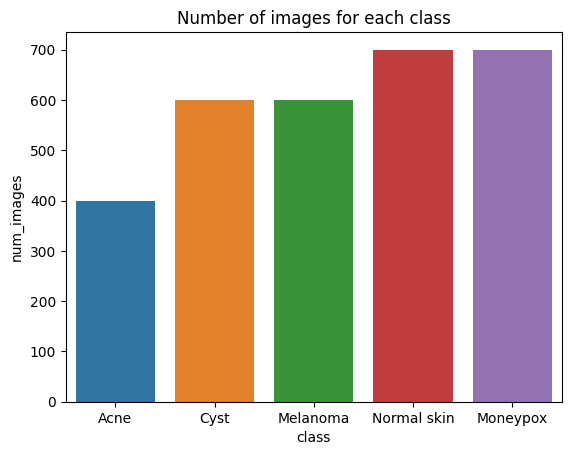

In [105]:
# seaborn barplot
sns.barplot(x='class', y='num_images', data=df)
plt.title('Number of images for each class')
plt.show()

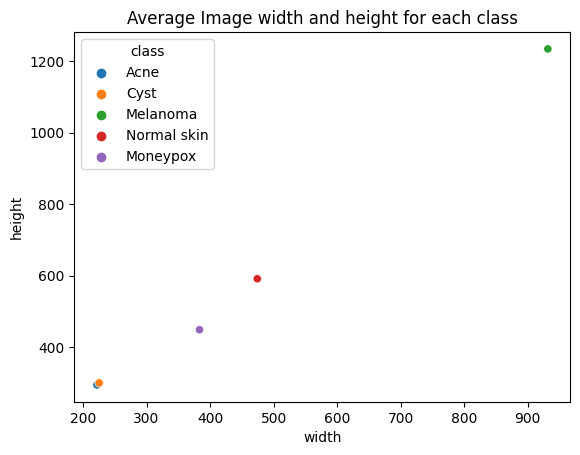

In [106]:
# scatter plot width and height for each class with tensorflow
import tensorflow as tf
import numpy as np

# get the image width and height for each class


def get_image_size(directory):
    width = []
    height = []
    for filename in os.listdir(directory):
        img = tf.io.read_file(directory + '/' + filename)
        img = tf.image.decode_jpeg(img, channels=3)
        width.append(img.shape[0])
        height.append(img.shape[1])
    return width, height


# get the image width and height for each class
acne_width, acne_height = get_image_size(directory + '/Acne')
cyst_width, cyst_height = get_image_size(
    directory + '/Cyst, tumour and skin-tags')
melanoma_width, melanoma_height = get_image_size(directory + '/Melanoma')
normal_width, normal_height = get_image_size(directory + '/Normal skin')
moneypox_width, moneypox_height = get_image_size(directory + '/Moneypox')

# create a dataframe to store the data

df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'],
                   'width': [np.mean(acne_width), np.mean(cyst_width), np.mean(melanoma_width), np.mean(normal_width), np.mean(moneypox_width)],
                   'height': [np.mean(acne_height), np.mean(cyst_height), np.mean(melanoma_height), np.mean(normal_height), np.mean(moneypox_height)]})

# seaborn scatterplot

sns.scatterplot(x='width', y='height', hue='class', data=df)
plt.title('Average Image width and height for each class')
plt.show()

In [107]:
df_acne = pd.DataFrame({'width': acne_width, 'height': acne_height})
df_cyst = pd.DataFrame({'width': cyst_width, 'height': cyst_height})
df_melanoma = pd.DataFrame({'width': melanoma_width, 'height': melanoma_height})
df_normal = pd.DataFrame({'width': normal_width, 'height': normal_height})
df_moneypox = pd.DataFrame({'width': moneypox_width, 'height': moneypox_height})

<AxesSubplot: xlabel='width', ylabel='height'>

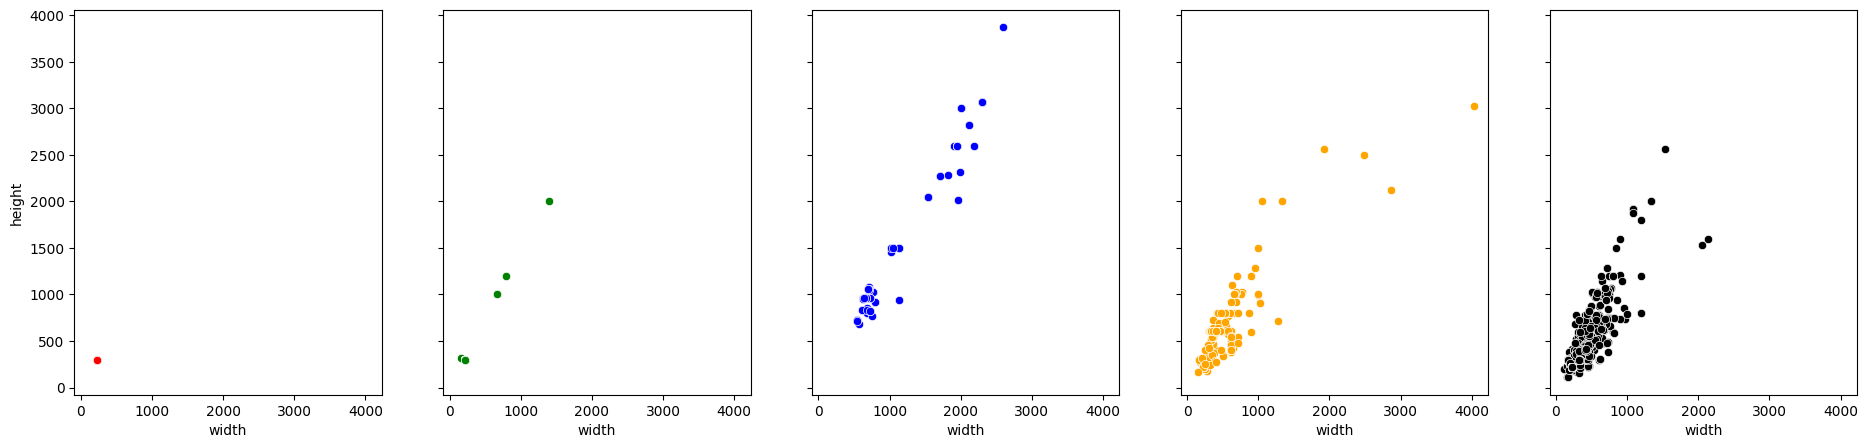

In [108]:
# seaborn subplot
fig, ax = plt.subplots(1, 5, figsize=(23, 5), sharey=True, sharex=True)

sns.scatterplot(ax=ax[0], data=df_acne, x="width", y="height", color='red')
sns.scatterplot(ax=ax[1], data=df_cyst, x="width", y="height", color='green')
sns.scatterplot(ax=ax[2], data=df_melanoma,x="width", y="height", color='blue')
sns.scatterplot(ax=ax[3], data=df_normal, x="width",y="height", color='orange')
sns.scatterplot(ax=ax[4], data=df_moneypox,x="width", y="height", color='black')

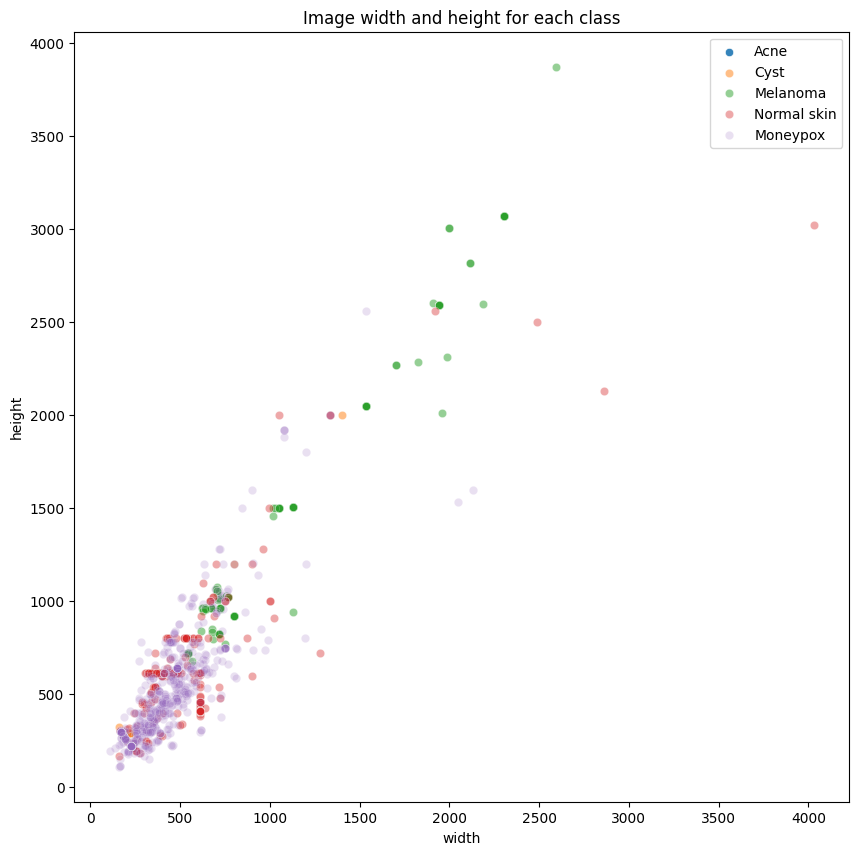

In [109]:
# seaborn scatterplot
# change plot size
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_acne, x="width", y="height", alpha=0.9,)
sns.scatterplot(data=df_cyst, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_melanoma, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_normal, x="width", y="height", alpha=0.4)
sns.scatterplot(data=df_moneypox, x="width", y="height", alpha=0.2)

plt.title('Image width and height for each class')
plt.legend(['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'])

In [ ]:
# RGB composition

In [110]:
directory = 'datathon 2022 dataset'
# ims = 256
image_size = (222, 294)
# Generates a tf.data.Dataset from image files in a directory.
df = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation='lanczos5',
    crop_to_aspect_ratio=False,
)
class_names = df.class_names

Found 2985 files belonging to 5 classes.


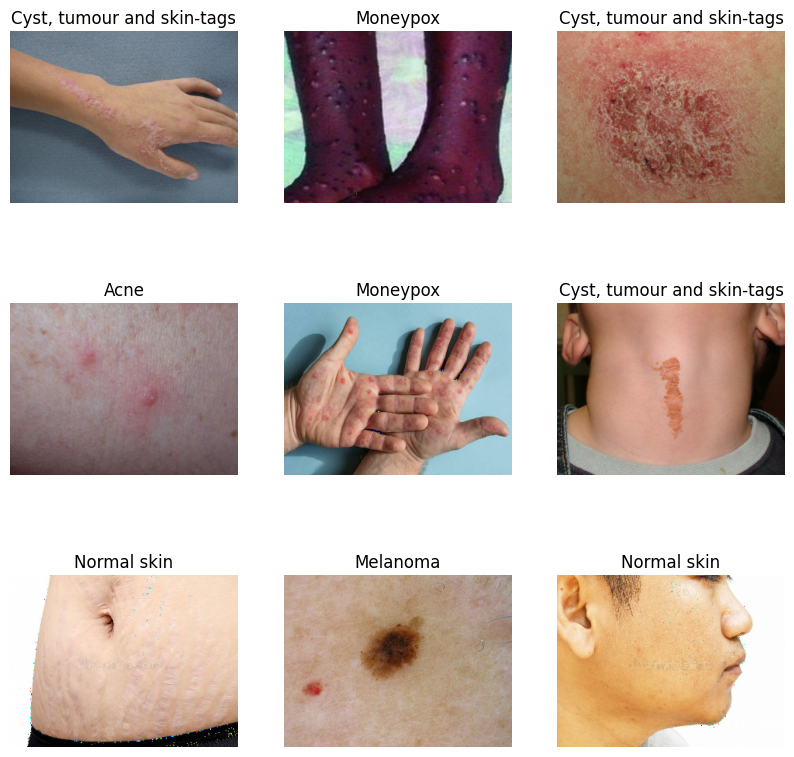

In [115]:
plt.figure(figsize=(10, 10))
for images, labels in df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [112]:
# subplot images for each class